# Task_7: Stock Market Prediction using Numerical and Textual Analysis

## Numerical Analysis

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance

### Download BSESN dataset from yahoo finance

In [31]:
df_finance = yfinance.download('^BSESN', start='2001-01-02', end='2020-12-31')
df_finance

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...
2020-12-23,46072.300781,46513.320312,45899.101562,46444.179688,46444.179688,10500
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600


In [32]:
df_finance.reset_index(inplace=True)
df_finance

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0
...,...,...,...,...,...,...,...
4916,2020-12-23,46072.300781,46513.320312,45899.101562,46444.179688,46444.179688,10500
4917,2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700
4918,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600
4919,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800


### Check summary of a DataFrame

In [33]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4921 entries, 0 to 4920
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4921 non-null   datetime64[ns]
 1   Open       4921 non-null   float64       
 2   High       4921 non-null   float64       
 3   Low        4921 non-null   float64       
 4   Close      4921 non-null   float64       
 5   Adj Close  4921 non-null   float64       
 6   Volume     4921 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 269.2 KB


In [35]:
df_finance.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Data Visualization

Text(0, 0.5, 'Close')

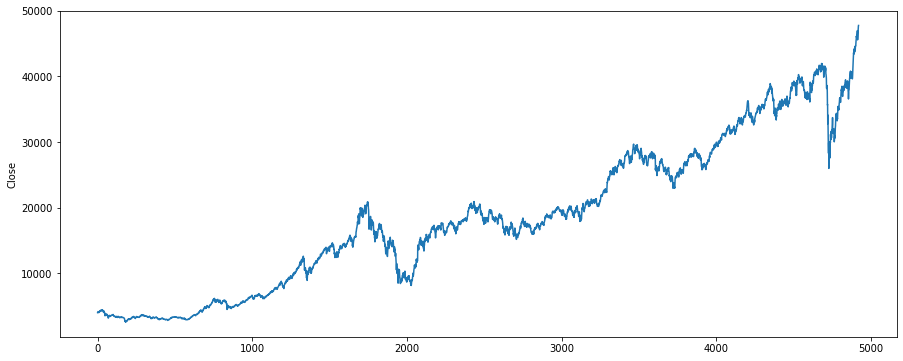

In [39]:
plt.figure(figsize=(15, 6))
df_finance['Close'].plot()
plt.ylabel('Close')

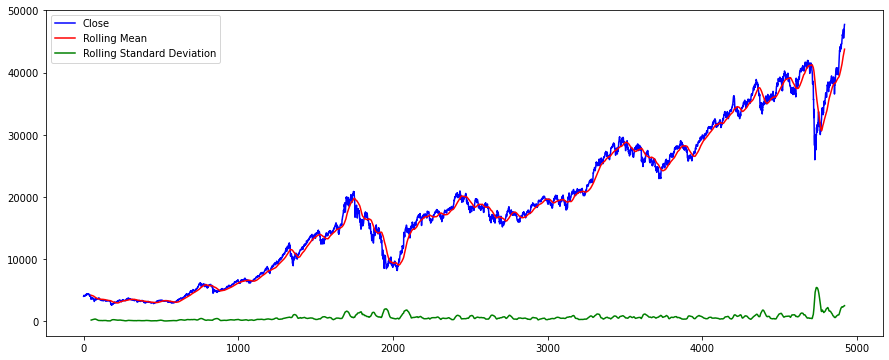

In [40]:
# Plotting moving average
plt.figure(figsize=(15, 6))
df_finance['Close'].plot(color = 'b', label = 'Close')
df_finance['Close'].rolling(window = 50).mean().plot(color = 'r', label = 'Rolling Mean')
df_finance['Close'].rolling(window = 50).std().plot(color = 'g', label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

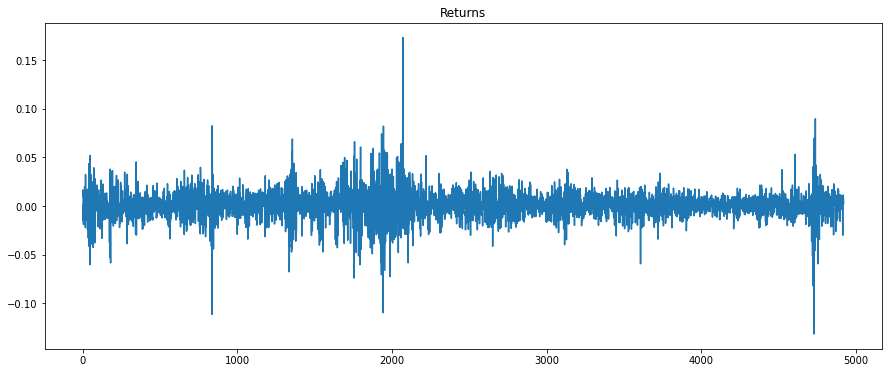

In [41]:
#Plotting returns
returns = df_finance['Close'] / df_finance['Close'].shift(1) - 1

plt.figure(figsize = (15, 6))
returns.plot(label='Return')
plt.title("Returns")

In [59]:
# Stationarity test
from statsmodels.tsa.stattools import adfuller, acf, pacf

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(20).mean()
    rolstd = timeseries.rolling(20).std()

    #Plot rolling statistics:
    plt.figure(figsize = (15, 6))
    plt.plot(timeseries, color = 'y', label = 'original')
    plt.plot(rolmean, color = 'r', label = 'rolling mean')
    plt.plot(rolstd, color = 'b', label = 'rolling std')
    plt.xlabel('Date')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
    plt.show(block = False)

    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, time series is non-stationary ")

In [54]:
# Spliting dataset into train and test
training_size = int(len(df_1) * 0.8)
test_size = len(df_1) - training_size
train_data, test_data = df_finance[:training_size], df_finance[training_size:]

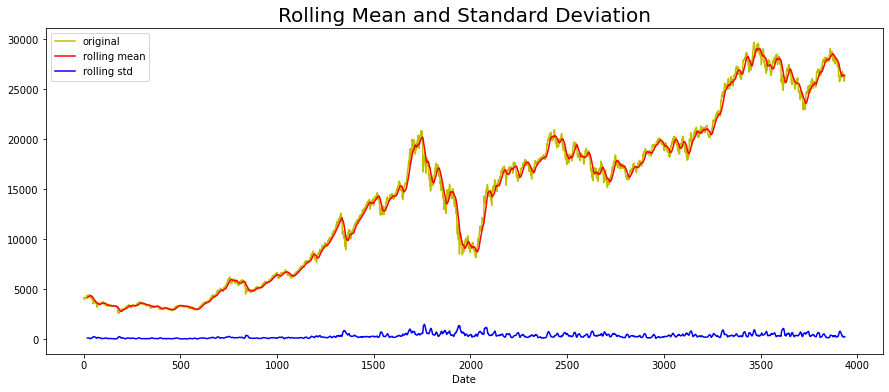

Results of dickey fuller test
ADF Test Statistic : -0.6084862376036583
p-value : 0.8690529318546363
#Lags Used : 5
Number of Observations Used : 3930
Weak evidence against null hypothesis, time series is non-stationary 


In [60]:
test_stationarity(train_data['Close'])

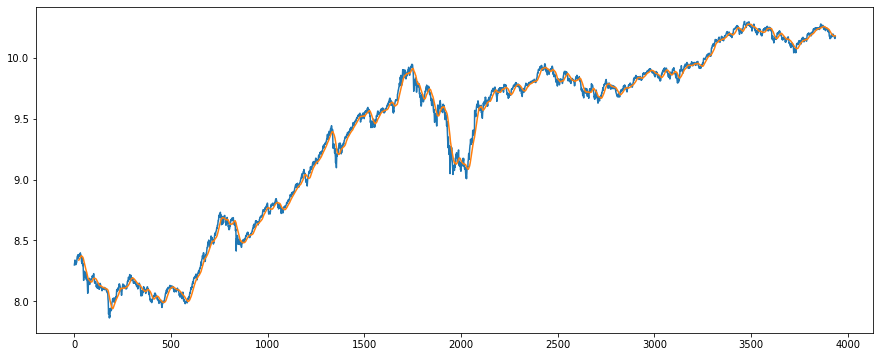

In [61]:
plt.figure(figsize = (15, 6))
plt.plot(np.log(train_data['Close'])) 
plt.plot(np.log(train_data['Close']).rolling(24).mean());

### Transform data into `0` to `1`

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_1 = scaler.fit_transform(np.array(df_finance['Close']).reshape(-1, 1))

### Split data into train and test dataset

In [63]:
# Spliting dataset into train and test
training_size = int(len(df_1) * 0.8)
test_size = len(df_1) - training_size
train_data, test_data = df_1[:training_size, :], df_1[training_size:, :]

In [64]:
len(train_data), len(test_data)

(3936, 985)

In [65]:
training_size, test_size

(3936, 985)

### Data pre-processing for time series analysis

In [66]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [73]:
x_train, y_train = create_dataset(train_data, 100)
x_test, y_test = create_dataset(test_data, 100)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3835, 100), (884, 100), (3835,), (884,))

In [74]:
x_train

array([[0.03142597, 0.03233723, 0.03356325, ..., 0.02399055, 0.02347246,
        0.024809  ],
       [0.03233723, 0.03356325, 0.03507745, ..., 0.02347246, 0.024809  ,
        0.02529454],
       [0.03356325, 0.03507745, 0.03367534, ..., 0.024809  , 0.02529454,
        0.02352185],
       ...,
       [0.56315409, 0.56723615, 0.56376387, ..., 0.52513641, 0.52368336,
        0.51786268],
       [0.56723615, 0.56376387, 0.56268426, ..., 0.52368336, 0.51786268,
        0.51921605],
       [0.56376387, 0.56268426, 0.56221006, ..., 0.51786268, 0.51921605,
        0.51404175]])

In [75]:
# reshaoe input to be [samples, time_steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

x_train.shape, x_test.shape

((3835, 100, 1), (884, 100, 1))

### Create and run model

In [70]:
import tensorflow as tf

In [76]:
# Create model
model_0 = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(100, 1)),
    tf.keras.layers.LSTM(50, return_sequences=True),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_0.compile(loss=tf.keras.losses.mean_squared_error,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

In [77]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [78]:
history_0 = model_0.fit(x_train, y_train,
                        epochs=100,
                        validation_data=(x_test, y_test))

Epoch 1/100
120/120 [==============================] - 16s 50ms/step - loss: 0.0041 - mae: 0.0318 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 2/100
120/120 [==============================] - 4s 37ms/step - loss: 1.7966e-04 - mae: 0.0097 - val_loss: 0.0015 - val_mae: 0.0302
Epoch 3/100
120/120 [==============================] - 4s 36ms/step - loss: 1.6908e-04 - mae: 0.0094 - val_loss: 9.7626e-04 - val_mae: 0.0218
Epoch 4/100
120/120 [==============================] - 4s 36ms/step - loss: 1.6126e-04 - mae: 0.0092 - val_loss: 0.0017 - val_mae: 0.0352
Epoch 5/100
120/120 [==============================] - 4s 36ms/step - loss: 1.5561e-04 - mae: 0.0090 - val_loss: 8.3972e-04 - val_mae: 0.0209
Epoch 6/100
120/120 [==============================] - 4s 37ms/step - loss: 1.7309e-04 - mae: 0.0095 - val_loss: 0.0013 - val_mae: 0.0302
Epoch 7/100
120/120 [==============================] - 4s 37ms/step - loss: 1.4884e-04 - mae: 0.0088 - val_loss: 9.0509e-04 - val_mae: 0.0234
Epoch 8/100
120/120 [====

120/120 [==============================] - 4s 37ms/step - loss: 2.6607e-05 - mae: 0.0037 - val_loss: 2.6839e-04 - val_mae: 0.0125
Epoch 59/100
120/120 [==============================] - 4s 36ms/step - loss: 3.7517e-05 - mae: 0.0044 - val_loss: 2.7881e-04 - val_mae: 0.0130
Epoch 60/100
120/120 [==============================] - 4s 36ms/step - loss: 2.7233e-05 - mae: 0.0037 - val_loss: 1.9578e-04 - val_mae: 0.0096
Epoch 61/100
120/120 [==============================] - 4s 37ms/step - loss: 2.9241e-05 - mae: 0.0039 - val_loss: 4.8522e-04 - val_mae: 0.0192
Epoch 62/100
120/120 [==============================] - 4s 36ms/step - loss: 3.0507e-05 - mae: 0.0040 - val_loss: 1.5573e-04 - val_mae: 0.0081
Epoch 63/100
120/120 [==============================] - 4s 36ms/step - loss: 2.9013e-05 - mae: 0.0039 - val_loss: 1.9726e-04 - val_mae: 0.0098
Epoch 64/100
120/120 [==============================] - 4s 36ms/step - loss: 3.3581e-05 - mae: 0.0042 - val_loss: 3.2900e-04 - val_mae: 0.0147
Epoch 65/100

### Model evaluate

In [79]:
model_0.evaluate(x_test, y_test)

28/28 [==============================] - 0s 15ms/step - loss: 3.3722e-04 - mae: 0.0151


[0.00033721968065947294, 0.015071834437549114]

In [80]:
# Let's Do the prediction and check performance metrics
train_pred = model_0.predict(x_train)
test_pred = model_0.predict(x_test)

In [81]:
# Transformback to original form
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [82]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, train_pred))

16538.02894389073

In [83]:
np.sqrt(mean_squared_error(y_test, test_pred))

35888.14262370679

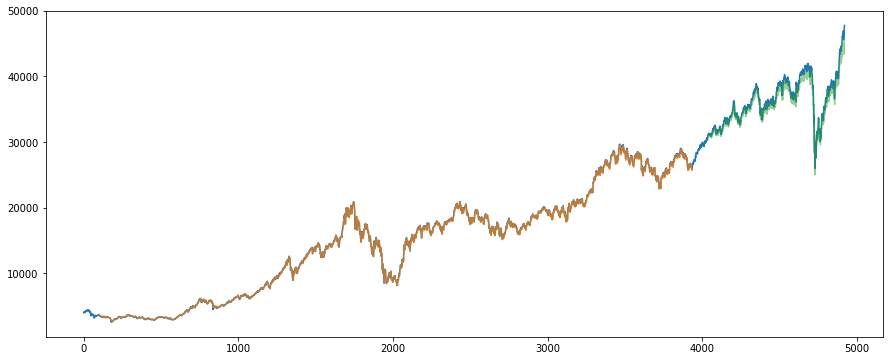

In [91]:
train_pred_plot = np.empty_like(df_1)
train_pred_plot[:, :] = np.nan
train_pred_plot[100:len(train_pred)+100, :] = train_pred

test_pred_plot = np.empty_like(df_1)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(train_pred)+(100*2)+1 : len(df_1)-1, :] = test_pred

plt.figure(figsize=(15, 6))
plt.plot(scaler.inverse_transform(df_1))
plt.plot(train_pred_plot, alpha=0.70)
plt.plot(test_pred_plot, alpha=0.50)

## Textual Analysis

### Load data

In [3]:
df_news = pd.read_csv('india-news-headlines.csv')
df_news

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...


In [7]:
df_news['publish_date'] = pd.to_datetime(df_news['publish_date'],format= '%Y%m%d')
df_news

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424062,2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,removed,Govt extends deadline for use of FASTag till F...


In [10]:
df_news.drop(columns=['headline_category'], inplace=True)

In [11]:
#Grouping the headlines for each day
df_news['headline_text'] = df_news.groupby(['publish_date']).transform(lambda x : ' '.join(x)) 
df_news = df_news.drop_duplicates() 
df_news.reset_index(inplace = True, drop = True)
df_news

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [13]:
df_news['headline_text']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7257    #BigInterview! Dhritiman Chatterjee: Nobody da...
7258    Horoscope Today; 28 December 2020: Check astro...
7259    Man recovers charred remains of 'thief' from h...
7260    Numerology Readings 30 December 2020: Predicti...
7261    Horoscope Today; 31 December 2020: Check astro...
Name: headline_text, Length: 7262, dtype: object

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

### Cleaning headlines

In [17]:
headlines = []
for i in range(0,len(df_news['headline_text'])):
    news = re.sub('[^a-zA-Z]',' ',df_news['headline_text'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news=' '.join(news)
    headlines.append(news)

In [18]:
df_news['headline_text'] = pd.Series(headlines)
df_news

C:\Users\home_\AppData\Local\Temp/ipykernel_12652/3932733868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['headline_text'] = pd.Series(headlines)


,publish_date,headline_text
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...
1,2001-01-03,powerless north india grope dark think laxman ...
2,2001-01-04,string pull stephen hawk india vajpaye give bi...
3,2001-01-05,light combat craft take india club class hawk ...
4,2001-01-06,light combat craft take india club class hawk ...
...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...
7258,2020-12-28,horoscop today decemb check astrolog predict a...
7259,2020-12-29,man recov char remain thief burnt shop dump be...
7260,2020-12-30,numerolog read decemb predict lucki colour luc...


### Adding subjectivity and polarity columns

In [19]:
from textblob import TextBlob

# Functions to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

In [20]:
df_news['subjectivity'] = df_news['headline_text'].apply(getSubjectivity)
df_news['polarity'] = df_news['headline_text'].apply(getPolarity)
df_news

C:\Users\home_\AppData\Local\Temp/ipykernel_12652/3567203989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['subjectivity'] = df_news['headline_text'].apply(getSubjectivity)
C:\Users\home_\AppData\Local\Temp/ipykernel_12652/3567203989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['polarity'] = df_news['headline_text'].apply(getPolarity)


,publish_date,headline_text,subjectivity,polarity
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394
...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116


<AxesSubplot:>

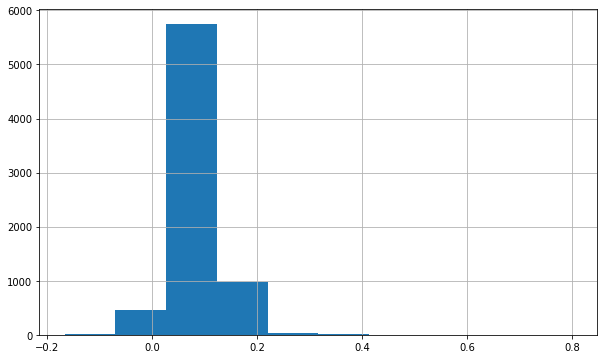

In [21]:
plt.figure(figsize = (10,6))
df_news['polarity'].hist()

<AxesSubplot:>

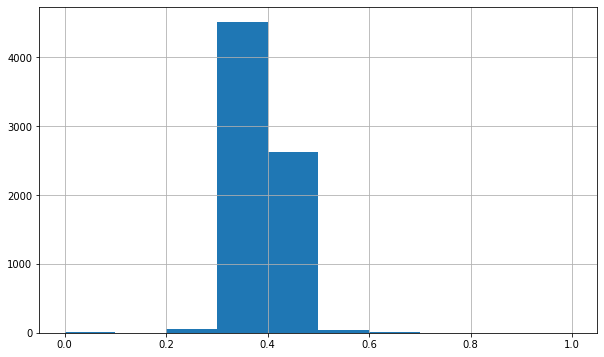

In [22]:
plt.figure(figsize = (10,6))
df_news['subjectivity'].hist()

###  Adding sentiment score to df_news

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df_news['compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['headline_text']]
df_news['negative'] = [sia.polarity_scores(v)['neg'] for v in df_news['headline_text']]
df_news['neutral'] = [sia.polarity_scores(v)['neu'] for v in df_news['headline_text']]
df_news['positive'] = [sia.polarity_scores(v)['pos'] for v in df_news['headline_text']]
df_news

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\home_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\home_\AppData\Local\Temp/ipykernel_12652/1879083984.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['compound'] = [sia.polarity_scores(v)['compound'] for v in df_news['headline_text']]
C:\Users\home_\AppData\Local\Temp/ipykernel_12652/1879083984.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['negative'] = [si

,publish_date,headline_text,subjectivity,polarity,compound,negative,neutral,positive
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394,-0.7579,0.207,0.649,0.144
...,...,...,...,...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187,-0.9998,0.145,0.786,0.068
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493,-0.9996,0.120,0.807,0.074
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856,-0.9998,0.145,0.782,0.073
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116,-0.9999,0.149,0.782,0.069


In [92]:
df_news.rename(columns={'publish_date':'Date'}, inplace=True) 

C:\Users\home_\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [93]:
df_news

,Date,headline_text,subjectivity,polarity,compound,negative,neutral,positive
0,2001-01-02,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-06,light combat craft take india club class hawk ...,0.425758,0.389394,-0.7579,0.207,0.649,0.144
...,...,...,...,...,...,...,...,...
7257,2020-12-27,biginterview dhritiman chatterje nobodi dare m...,0.366994,0.058187,-0.9998,0.145,0.786,0.068
7258,2020-12-28,horoscop today decemb check astrolog predict a...,0.395275,0.085493,-0.9996,0.120,0.807,0.074
7259,2020-12-29,man recov char remain thief burnt shop dump be...,0.399135,0.068856,-0.9998,0.145,0.782,0.073
7260,2020-12-30,numerolog read decemb predict lucki colour luc...,0.389012,0.040116,-0.9999,0.149,0.782,0.069


### Data merge using inner join by date

In [94]:
df_merge = pd.merge(df_finance, df_news, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,subjectivity,polarity,compound,negative,neutral,positive
0,2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,4018.879883,0,statu quo disturb ayodhya say vajpaye fissur h...,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,4060.020020,0,powerless north india grope dark think laxman ...,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,4115.370117,0,string pull stephen hawk india vajpaye give bi...,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,4183.729980,0,light combat craft take india club class hawk ...,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,4120.430176,0,sangh parivar babri panel ant frontrunn key us...,0.486204,-0.035142,-0.6808,0.100,0.816,0.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,2020-12-23,46072.300781,46513.320312,45899.101562,46444.179688,46444.179688,10500,sawmil makarpura gidc gut none hurt civic bodi...,0.368617,0.091200,-0.9999,0.145,0.789,0.066
4888,2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,46973.539062,13700,set mood sex cold winter two hous blow gujarat...,0.386303,0.065157,-0.9995,0.116,0.809,0.075
4889,2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,47353.750000,9600,horoscop today decemb check astrolog predict a...,0.395275,0.085493,-0.9996,0.120,0.807,0.074
4890,2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,47613.078125,12800,man recov char remain thief burnt shop dump be...,0.399135,0.068856,-0.9998,0.145,0.782,0.073


### Data preparation

In [95]:
df_merge.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'headline_text', 'subjectivity', 'polarity', 'compound', 'negative',
       'neutral', 'positive'],
      dtype='object')

In [96]:
df = df_merge.drop(columns=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'headline_text'])
df

,Close,subjectivity,polarity,compound,negative,neutral,positive
0,4018.879883,0.298148,0.099074,-0.8555,0.125,0.773,0.102
1,4060.020020,0.429167,0.025000,-0.5994,0.132,0.755,0.113
2,4115.370117,0.475140,0.032481,0.9169,0.099,0.791,0.110
3,4183.729980,0.458412,0.296404,-0.3612,0.171,0.659,0.170
4,4120.430176,0.486204,-0.035142,-0.6808,0.100,0.816,0.084
...,...,...,...,...,...,...,...
4887,46444.179688,0.368617,0.091200,-0.9999,0.145,0.789,0.066
4888,46973.539062,0.386303,0.065157,-0.9995,0.116,0.809,0.075
4889,47353.750000,0.395275,0.085493,-0.9996,0.120,0.807,0.074
4890,47613.078125,0.399135,0.068856,-0.9998,0.145,0.782,0.073


### Data Normalization

In [97]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df

,Close,subjectivity,polarity,compound,negative,neutral,positive
0,0.031426,0.298148,0.404464,0.072254,0.382263,0.699735,0.134921
1,0.032337,0.429167,0.287402,0.200310,0.403670,0.675926,0.149471
2,0.033563,0.475140,0.299225,0.958498,0.302752,0.723545,0.145503
3,0.035077,0.458412,0.716311,0.319416,0.522936,0.548942,0.224868
4,0.033675,0.486204,0.192357,0.159608,0.305810,0.756614,0.111111
...,...,...,...,...,...,...,...
4887,0.971159,0.368617,0.392020,0.000050,0.443425,0.720899,0.087302
4888,0.982885,0.386303,0.350863,0.000250,0.354740,0.747354,0.099206
4889,0.991307,0.395275,0.383001,0.000200,0.366972,0.744709,0.097884
4890,0.997051,0.399135,0.356709,0.000100,0.443425,0.711640,0.096561


### Split into features and target dataset

In [99]:
x = new_df.drop(columns='Close')
y = new_df['Close']

x.shape, y.shape

((4892, 6), (4892,))

### Split into training and testing dataset

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3913, 6), (979, 6), (3913,), (979,))

### Load & run models

In [101]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {'RandomForestRegressor': RandomForestRegressor(),
          'GradientBoostingRegressor': GradientBoostingRegressor(),
          'XGBRegressor': XGBRegressor()}

mse = {}

for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train)
    # check mse
    y_pred = model.predict(x_test)
    mse[name] = mean_squared_error(y_test, y_pred)

In [102]:
mse

{'RandomForestRegressor': 0.02276905233351754,
 'GradientBoostingRegressor': 0.02267025158602378,
 'XGBRegressor': 0.02473526397442395}

<AxesSubplot:>

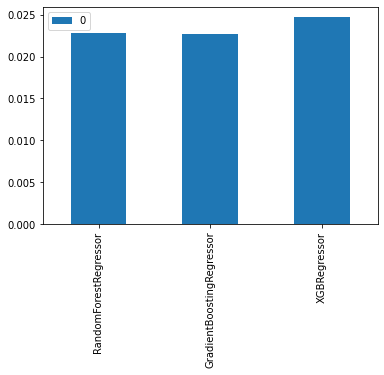

In [110]:
pd.DataFrame(mse, index=[0]).T.plot.bar()

> **As we see that `GradientBoostingRegressor` was model performs the best for the sentiment analysis.**